In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
def normalize(features):
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return features
def initialize_wt():
    weights = np.ones(shape=(14,1))
    return weights

In [2]:
def predict(features, weights):
        predictions = np.dot(features, weights)
        return predictions

In [3]:
def cost_function(features, targets, weights):
    N = len(targets)
    predictions = predict(features, weights)
    sq_error = (predictions - targets)**2
    return 1.0/(2*N) * sq_error.sum()

In [4]:
def update_weights(features, targets, weights, lr,):
    predictions = predict(features, weights)
    derivatives = np.dot(features.T, (targets-predictions))
    derivatives = ((derivatives*lr)/506)*(-1);
    weights -= derivatives 
    return weights

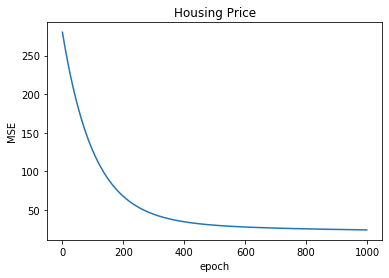

In [6]:
def main():
    my_data = genfromtxt('housing.csv')
    features = my_data[:,:13]#np array because extracted with genfromtxt
    targets = my_data[:,13:]
    features = normalize(features)
    weights = initialize_wt()
    lr = 0.005
    bias = np.ones(shape=(len(features),1))
    features = np.append(bias, features, axis=1)
    #print(features)
    MSE_array = []
    for i in range(1000):
        MSE = cost_function(features, targets, weights)
        weights = update_weights(features, targets, weights, lr)
        #print(MSE)
        MSE_array.append(MSE)
    plt.plot(MSE_array,)
    plt.title("Housing Price")
    plt.ylabel("MSE")
    plt.xlabel("epoch")
    plt.show()
if __name__== "__main__":
 main()